# 1. 폴더 정리

* 제공해드린 animals10.zip의 압축을 풀어 그 내용을 살펴보시고, 폴더 구조를 학습에 알맞도록 재구성해주세요
* 특히 각 클래스마다 약 30% 정도의 이미지를 test 폴더에 할당해주세요
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요 (ex. flat_test[:5]로 앞의 다섯값 확인)
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

In [1]:
### Guideline for convenience ###
# 압축 풀기

# colab 사용할 경우
# 내 구글 드라이브에 있는 파일 사용하고 싶을 때 쓰는 코드
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -qq "/content/drive/MyDrive/CNN/animals10.zip"

In [3]:
# python에서 파일 관리해주는 라이브러리
import os
import glob
import shutil

In [4]:
# 각 클래스별 파일 개수 확인 -> 변수로 해당 개수 저장
# Tip) 클래스가 10개이므로 각 클래스마다 똑같은 내용의 코드를 계속 써야할까요? 클래스 이름을 리스트로 저장해 for문을 돌리면서 코드를 재사용하는건 어떨까요?

animals_list = ['butterfly','cat','chicken','cow','dog','elephant','horse','sheep','spider','squirrel']

# glob.glob로 파일 개수 확인

butterfly = sorted(glob.glob('./Animals-10/butterfly/*.jpg')) +sorted(glob.glob('./Animals-10/butterfly/*.jpeg')) + sorted(glob.glob('./Animals-10/butterfly/*.png'))
cat = sorted(glob.glob('./Animals-10/cat/*.jpg')) + sorted(glob.glob('./Animals-10/cat/*.jpeg')) + sorted(glob.glob('./Animals-10/cat/*.png'))
chicken = sorted(glob.glob('./Animals-10/chicken/*.jpg')) + sorted(glob.glob('./Animals-10/chicken/*.jpeg')) + sorted(glob.glob('./Animals-10/chicken/*.png'))
cow = sorted(glob.glob('./Animals-10/cow/*.jpg')) + sorted(glob.glob('./Animals-10/cow/*.jpeg')) + sorted(glob.glob('./Animals-10/cow/*.png'))
dog = sorted(glob.glob('./Animals-10/dog/*.jpg')) + sorted(glob.glob('./Animals-10/dog/*.jpeg')) + sorted(glob.glob('./Animals-10/dog/*.png'))
elephant = sorted(glob.glob('./Animals-10/elephant/*.jpg')) + sorted(glob.glob('./Animals-10/elephant/*.jpeg')) + sorted(glob.glob('./Animals-10/elephant/*.png'))
horse = sorted(glob.glob('./Animals-10/horse/*.jpg')) + sorted(glob.glob('./Animals-10/horse/*.jpeg')) + sorted(glob.glob('./Animals-10/horse/*.png'))
sheep = sorted(glob.glob('./Animals-10/cat/*.jpg')) + sorted(glob.glob('./Animals-10/cat/*.jpeg')) + sorted(glob.glob('./Animals-10/cat/*.png'))
spider = sorted(glob.glob('./Animals-10/cat/*.jpg')) + sorted(glob.glob('./Animals-10/cat/*.jpeg')) + sorted(glob.glob('./Animals-10/cat/*.png'))
squirrel = sorted(glob.glob('./Animals-10/cat/*.jpg')) + sorted(glob.glob('./Animals-10/cat/*.jpeg')) + sorted(glob.glob('./Animals-10/cat/*.png'))


print(len(butterfly))
print(len(cat))
print(len(chicken))
print(len(cow))
print(len(dog))
print(len(elephant))
print(len(horse))
print(len(sheep))
print(len(spider))
print(len(squirrel))



2112
1668
3098
1866
4863
1446
2623
1668
1668
1668


In [5]:
# test에 넣을 이미지 개수 계산

butterfly_test_count = round(len(butterfly)*0.3)
cat_test_count = round(len(cat)*0.3)
chicken_test_count = round(len(chicken)*0.3)
cow_test_count = round(len(cow)*0.3)
dog_test_count = round(len(dog)*0.3)
elephant_test_count = round(len(elephant)*0.3)
horse_test_count = round(len(horse)*0.3)
sheep_test_count = round(len(sheep)*0.3)
spider_test_count = round(len(spider)*0.3)
squirrel_test_count = round(len(squirrel)*0.3)

print(butterfly_test_count)
print(cat_test_count)
print(chicken_test_count)
print(cow_test_count)
print(dog_test_count)
print(elephant_test_count)
print(horse_test_count)
print(sheep_test_count)
print(spider_test_count)
print(squirrel_test_count)

634
500
929
560
1459
434
787
500
500
500


In [6]:
import random

def split(img_list, test_count, train_path, test_path):
  # img_list : 이미지 경로 리스트
  # test_count : test에 할당할 이미지 개수
  # train_path : train 데이터 넣을 경로
  # test_path : test 데이터 넣을 경로
  
  # 랜덤으로 test_count만큼 이미지 img_list에서 고르기
  # test 담을 이미지 리스트 저장
  test_files=[]
  for i in random.sample(img_list, test_count):
    test_files.append(i)

  # 위에서 고르지 않은 이미지들을 train 담을 이미지 리스트로 저장
  train_files = [x for x in img_list if x not in test_files]

  # 고른 이미지를 train_path, test_path폴더에 폭사
  for k in train_files:
    shutil.copy(k, train_path)
  
  for c in test_files:
    shutil.copy(c, test_path)

  print('train 폴더 이미지 개수 : {}\ntest 폴더 이미지 개수 : {}'.format(len(glob.glob(train_path+'/*')),len(glob.glob(test_path+'/*'))))

In [7]:
# train, test 폴더 경로 선언 & 만들기
# 폴더 경로 선언 & 만들기
butterfly_train_path='./train/butterfly'
butterfly_test_path='./test/butterfly'
os.makedirs(butterfly_train_path, exist_ok=True)
os.makedirs(butterfly_test_path, exist_ok=True)

cat_train_path='./train/cat'
cat_test_path='./test/cat'
os.makedirs(cat_train_path, exist_ok=True)
os.makedirs(cat_test_path, exist_ok=True)

chicken_train_path='./train/chicken'
chicken_test_path='./test/chicken'
os.makedirs(chicken_train_path, exist_ok=True)
os.makedirs(chicken_test_path, exist_ok=True)

cow_train_path='./train/cow'
cow_test_path='./test/cow'
os.makedirs(cow_train_path, exist_ok=True)
os.makedirs(cow_test_path, exist_ok=True)

dog_train_path='./train/dog'
dog_test_path='./test/dog'
os.makedirs(dog_train_path, exist_ok=True)
os.makedirs(dog_test_path, exist_ok=True)

elephant_train_path='./train/elephant'
elephant_test_path='./test/elephant'
os.makedirs(elephant_train_path, exist_ok=True)
os.makedirs(elephant_test_path, exist_ok=True)

horse_train_path='./train/horse'
horse_test_path='./test/horse'
os.makedirs(horse_train_path, exist_ok=True)
os.makedirs(horse_test_path, exist_ok=True)

sheep_train_path='./train/sheep'
sheep_test_path='./test/sheep'
os.makedirs(sheep_train_path, exist_ok=True)
os.makedirs(sheep_test_path, exist_ok=True)

spider_train_path='./train/spider'
spider_test_path='./test/spider'
os.makedirs(spider_train_path, exist_ok=True)
os.makedirs(spider_test_path, exist_ok=True)

squirrel_train_path='./train/squirrel'
squirrel_test_path='./test/squirrel'
os.makedirs(squirrel_train_path, exist_ok=True)
os.makedirs(squirrel_test_path, exist_ok=True)


In [8]:
# train, test 폴더로 이미지 split해서 알맞게 집어넣기
split(butterfly, butterfly_test_count, butterfly_train_path, butterfly_test_path)
split(cat, cat_test_count, cat_train_path, cat_test_path)
split(chicken, chicken_test_count, chicken_train_path, chicken_test_path)
split(cow, cow_test_count, cow_train_path, cow_test_path)
split(dog, dog_test_count, dog_train_path, dog_test_path)
split(elephant, elephant_test_count, elephant_train_path, elephant_test_path)
split(horse, horse_test_count, horse_train_path, horse_test_path)
split(sheep, sheep_test_count, sheep_train_path, sheep_test_path)
split(spider, spider_test_count, spider_train_path, spider_test_path)
split(squirrel, squirrel_test_count, squirrel_train_path, squirrel_test_path)

train 폴더 이미지 개수 : 1478
test 폴더 이미지 개수 : 634
train 폴더 이미지 개수 : 1168
test 폴더 이미지 개수 : 500
train 폴더 이미지 개수 : 2169
test 폴더 이미지 개수 : 929
train 폴더 이미지 개수 : 1306
test 폴더 이미지 개수 : 560
train 폴더 이미지 개수 : 3404
test 폴더 이미지 개수 : 1459
train 폴더 이미지 개수 : 1012
test 폴더 이미지 개수 : 434
train 폴더 이미지 개수 : 1836
test 폴더 이미지 개수 : 787
train 폴더 이미지 개수 : 1168
test 폴더 이미지 개수 : 500
train 폴더 이미지 개수 : 1168
test 폴더 이미지 개수 : 500
train 폴더 이미지 개수 : 1168
test 폴더 이미지 개수 : 500


# 2. CNN 모델
수업 코드에 '모델 성능에 대한 고민!!' 부분을 참고해서 **test 이미지 기준 최소 80% 이상**의 모델이 나올 수 있도록 학습을 진행해주세요.
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요
* 90% 이상의 모델이 이상적이긴 합니다
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

전반적으로 수업 코드와 비슷하게 짜면 되는데, 생각해봐야 할 것은
* 모든 이미지를 내가 정의하는 하나의 모델에 넣어야함
* 그말은 input 데이터의 차원이 항상 동일해야 된다는 말
* 그런데 과연 내가 가지고 있는 이미지들의 사이즈가 모두 같을까? - 대략 얼마정도 사이즈 가지고 있는지 코드로 확인해보면 더 좋음 (shape 확인)
* 이미지 사이즈를 통일시키기 위해서는 어떻게 해야할까? - transforms의 Resize, RandomCrop 써볼까?
* 동물 이미지에 적합한 Augmentation은 무엇이 있을까?

In [9]:
import torch
import torchvision
import torchvision.transforms as transforms

In [10]:
# train, test 이미지를 위한 transforms function 정의
# 위에서 말한 포인트들 생각해보기 - 차원에 유의하자!

# 보통 적용할 augmentation을 ToTensor, Normalize 전에 사용
# transforms가 제공하는 augmentation 함수 사용
transform_animals_train = transforms.Compose([
    transforms.ColorJitter(brightness=0.5),
    transforms.Resize((224,224)),                 # 300으로 resize
    #transforms.RandomCrop(224),             # 랜덤으로 224만큼 crop 정사각형 형태로 하는 것이 좋음
    transforms.RandomHorizontalFlip(p=0.5), # 0.5 확률로 horizontal flip
    #transforms.RandomRotation(20),          # 랜덤으로 20도 만큼 rotate
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [11]:
# transform function for test dataset
transform_animals_test = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [12]:
# ImageFolder와 앞서 정의한 transforms function을 활용해 Dataset 객체 (train, test에 대해) 선언
train_dataset_animals = torchvision.datasets.ImageFolder(
    root = './train', # 바로 train 폴더 지정
    transform = transform_animals_train 
)
test_dataset_animals = torchvision.datasets.ImageFolder(
    root = './test',
    transform = transform_animals_test
)

In [13]:
print(len(train_dataset_animals))
print(len(test_dataset_animals))

15877
6803


In [ ]:
# train dataset의 첫번째 img의 label 확인
train_dataset_animals[0]

(tensor([[[-0.5082, -0.5082, -0.4739,  ..., -0.9534, -0.9534, -0.9705],
          [-0.5082, -0.4911, -0.4739,  ..., -0.9534, -0.9534, -0.9877],
          [-0.5082, -0.5082, -0.4739,  ..., -0.9534, -0.9705, -0.9705],
          ...,
          [-0.3712, -0.3712, -0.3712,  ..., -0.4397, -0.4568, -0.4568],
          [-0.3883, -0.3883, -0.3883,  ..., -0.4568, -0.4568, -0.4568],
          [-0.4054, -0.4054, -0.4054,  ..., -0.4568, -0.4739, -0.4739]],
 
         [[-0.4251, -0.4251, -0.4076,  ..., -0.6352, -0.6352, -0.6527],
          [-0.4251, -0.4076, -0.4076,  ..., -0.6176, -0.6527, -0.6702],
          [-0.4426, -0.4251, -0.4251,  ..., -0.6527, -0.6527, -0.6702],
          ...,
          [-0.2675, -0.2675, -0.2675,  ..., -0.4776, -0.4951, -0.4951],
          [-0.2850, -0.2850, -0.2850,  ..., -0.4951, -0.4951, -0.4951],
          [-0.3025, -0.3025, -0.3025,  ..., -0.4951, -0.4951, -0.4951]],
 
         [[-0.5147, -0.5147, -0.4798,  ..., -1.0550, -1.0550, -1.0550],
          [-0.5147, -0.5147,

In [ ]:
train_dataset_animals

Dataset ImageFolder
    Number of datapoints: 15877
    Root location: ./train
    StandardTransform
Transform: Compose(
               ColorJitter(brightness=[0.5, 1.5], contrast=None, saturation=None, hue=None)
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )

In [ ]:
train_dataset_animals[0][0].shape

torch.Size([3, 224, 224])

In [ ]:
# train, test에 대해 DataLoader 정의

In [14]:
trainloader_animals = torch.utils.data.DataLoader(
    train_dataset_animals,
    batch_size = 32,      # 일반적으로 batch size = 16, 32
    shuffle=True,         # train dataloader는 epoch마다 데이터 다시 섞어서 batch 만들고 학습! - 학습 효율 up
    num_workers=2
)

In [15]:
testloader_animals = torch.utils.data.DataLoader(
    test_dataset_animals,
    batch_size = 32,      # 일반적으로 batch size = 16, 32
    shuffle=False,        # test dataloader는 데이터 매번 섞을 이유가 없음 - 어차피 확인 용도
    num_workers=2
)

In [ ]:
# 15877/32 = 497
len(trainloader_animals)

497

In [ ]:
# 6803/32 = 213
len(testloader_animals)

213

In [ ]:
# dataloader의 iteration 하나만 가져와서 확인해보자
tmploader_cifar = torch.utils.data.DataLoader(test_dataset_animals, batch_size = 32, shuffle=False)
dataiter = iter(tmploader_cifar)
images, labels = dataiter.next()

In [ ]:
images.shape # 32개 img

torch.Size([32, 3, 224, 224])

In [ ]:
labels.shape # 32개 label

torch.Size([32])

In [16]:
# animals의 10개 class
classes = ('butterfly', 'cat', 'chicken', 'cow',
           'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel')

In [17]:
#데이터 전처리하는데 필요한 라이브러리 PIL
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [ ]:
# test dataloader의 첫 batch 확인
def imshow_loader(img):
    img = img * 0.225 + 0.456 # 정확한 값은 아니지만 대강 normalize 반대로
    img_np = np.array(img)
    imshow(np.transpose(img_np, (1,2,0)))
    plt.show()

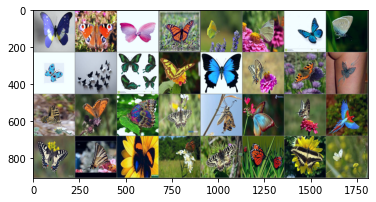

butterfly butterfly butterfly butterfly


In [ ]:
imshow_loader(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
### Model 클래스 정의 - 차원에 유의하자!
# 10개의 클래스를 분류해야 하는 꽤나 복잡한 task - 모델 구조를 어느 정도로 복잡하게 짜볼까?
# 가장 마지막 Linear의 out_features는 얼마로 해야할까?

In [18]:
import torch.nn as nn

In [ ]:
#### 모델 정의 시 유념해야할 건 각 층의 결과물의 차원!
#### 모델이 복잡해지면 복잡해질수록 이는 더욱 중요해지므로 레이어별로 도출되는 데이터의 크기를 써넣는 것을 추천 (안맞으면 에러남)


class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        ##### Layer 정의 #####
        self.layer = nn.Sequential(
            # 맨처음 RGB 채널 3개이므로 가장 처음 in_channels = 3
            # img의 가장 첫 차원이 batch_size 값은 계속해서 유지
            # out_channels 는 필터 갯수 = feature 갯수, kernel_size는 필터 사이즈 padding은 default 0
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3),             # [batch_size,3,224,224] -> [batch_size,16,222,222] 
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),            # [batch_size,16,222,222] -> [batch_size,32,220,220]
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5),            # [batch_size,32,220,220] -> [batch_size,64,216,216]
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout(0.4), # 0.2 확률로 Dropout
            nn.MaxPool2d(kernel_size=2, stride=2),                                # [batch_size,64,216,216] -> [batch_size,64,108,108]
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3),           # [batch_size,64,108,108] -> [batch_size,128,106,106] 
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3),            # [batch_size,128,106,106] -> [batch_size,64,104,104]
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.MaxPool2d(kernel_size=2, stride=2),                                 # [batch_size,64,104,104] -> [batch_size,64,52,52]
            nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3),            # [batch_size,64,52,52] -> [batch_size,32,50,50]
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),                                 # [batch_size,32,50,50] -> [batch_size,32,25,25]
            nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3),            # [batch_size,32,25,25] -> [batch_size,16,23,23]
            nn.BatchNorm2d(16),
            nn.ReLU()                              
        )

        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        
        self.fc_layer = nn.Sequential(                                            # classifier는 full connected layer, full connected layer 넣기 위해 일자로 펴준 다음에 linear 넣으면 됨
            nn.Linear(16*23*23,100),                                                # [batch_size,16*18*18] -> [batch_size,100]
            nn.ReLU(),
            nn.Linear(100,10)                                                      # [batch_size,100] -> [batch_size,10]
        )

    def forward(self, x):
        # forward pass 과정
        out = self.layer(x)
        out = self.avgpool(out)
        out = out.view(out.size(0),-1)  # FC layer에 들어가기전, flatten! - view 함수 활용
                                        # 가장 첫 차원인 batch_size는 유지하고 나머지 차원들을 하나로 합치기 - [batch_size,16,5,5] -> [batch_size,16*5*5]
        out = self.fc_layer(out)
        return out

In [ ]:
#### 모델 정의 시 유념해야할 건 각 층의 결과물의 차원!
#### 모델이 복잡해지면 복잡해질수록 이는 더욱 중요해지므로 레이어별로 도출되는 데이터의 크기를 써넣는 것을 추천 (안맞으면 에러남)


class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        for m in self.modules():
          if isinstance(m, nn.Conv2d):
            nn.init.kaiming_normal_(m.weight, mode="fan_out", nonlinearity="relu")
          elif isinstance(m, nn.BatchNorm2d):
            nn.init.constant_(m.weight, 1)
            nn.init.constant_(m.bias, 0)
        
        ##### Layer 정의 #####
        self.layer = nn.Sequential(
            # 맨처음 RGB 채널 3개이므로 가장 처음 in_channels = 3
            # img의 가장 첫 차원이 batch_size 값은 계속해서 유지
            # out_channels 는 필터 갯수 = feature 갯수, kernel_size는 필터 사이즈 padding은 default 0
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding = 1, stride = 1),             # [batch_size,3,224,224] -> [batch_size,32,224,224]
            nn.BatchNorm2d(32), 
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1, stride=1),            # [batch_size,32,224,224] -> [batch_size,32,224,224]
            nn.BatchNorm2d(32),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),                                # [batch_size,32,224,224] -> [batch_size,32,112,112]
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),           # [batch_size,32,112,112] -> [batch_size,64,110,110] 
            nn.BatchNorm2d(64),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3),            # [batch_size,64,110,110] -> [batch_size,128,108,108]
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.MaxPool2d(kernel_size=2, stride=2),                                 # [batch_size,128,108,108] -> [batch_size,128,54,54]
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1, stride=1),            # [batch_size,128,54,54] -> [batch_size,256,54,54]
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1, stride=1),            # [batch_size,256,54,54] -> [batch_size,512,54,54]
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Conv2d(in_channels=512, out_channels=256, kernel_size=3, padding=1, stride=1),            # [batch_size,512,54,54] -> [batch_size,256,54,54]
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, padding=1, stride=1),            # [batch_size,256,54,54] -> [batch_size,128,54,54]
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, padding=1, stride=1),            # [batch_size,128,54,54] -> [batch_size,64,54,54]
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3),            # [batch_size,64,54,54] -> [batch_size,32,52,52]
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),                                 # [batch_size,32,52,52] -> [batch_size,32,26,26]
            nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3),            # [batch_size,32,26,26] -> [batch_size,16,24,24]
            nn.BatchNorm2d(16),
            nn.Dropout(0.4),
            nn.ReLU(),                             
        )

        self.avgpool = nn.AdaptiveAvgPool2d((1,1))

        self.fc_layer = nn.Sequential(                                            # classifier는 full connected layer, full connected layer 넣기 위해 일자로 펴준 다음에 linear 넣으면 됨
            nn.Linear(16*24*24,256),                                                # [batch_size,32*23*23] -> [batch_size,256]
            nn.ReLU(),
             nn.Linear(256,100),                                                # [batch_size,256] -> [batch_size,100]
            nn.ReLU(),
            nn.Linear(100,10)                                                      # [batch_size,100] -> [batch_size,10]
        )

    def forward(self, x):
        # forward pass 과정
        out = self.layer(x)
        out = self.avgpool(x)
        out = out.view(out.size(0),-1)  # FC layer에 들어가기전, flatten! - view 함수 활용
                                        # 가장 첫 차원인 batch_size는 유지하고 나머지 차원들을 하나로 합치기 - [batch_size,16,5,5] -> [batch_size,16*5*5]
        out = self.fc_layer(out)
        return out

In [40]:
# SimpleCNN의 구조를 변경
# 입력 채널: 3 출력 채널: 32 
# 입력 채널: 32(앞 layer 출력 채널 수 그대로) 출력 채널: 임의
# max pool 2d는 이미지 사이즈를 줄여주는 역할 

class MyModel(nn.Module):

    def __init__(self):
        super().__init__()
        
        self.conv_layers = nn.Sequential(
           nn.Conv2d( in_channels=3, out_channels=32, kernel_size=3, padding=1 ), # 3, 224x224 -> 32, 224x224
           nn.BatchNorm2d(32),
           nn.ReLU(),
           
           nn.Conv2d( in_channels=32, out_channels=32, kernel_size=3, padding=1 ), # 32, 224x224 -> 32, 224x224
           nn.BatchNorm2d(32),
           nn.ReLU(),
           nn.MaxPool2d(2), # 32, 224x224 -> 32, 112x112

           nn.Conv2d( in_channels=32, out_channels=64, kernel_size=3, padding=1 ), # 32, 112x112 -> 64, 112x112
           nn.BatchNorm2d(64),
           nn.ReLU(),
           
           nn.Conv2d( in_channels=64, out_channels=32, kernel_size=3, padding=1 ), # 64, 112x112 -> 32, 112x112
           nn.BatchNorm2d(32),
           nn.ReLU(),
           nn.MaxPool2d(2), # 32, 112x112 -> 32, 56x56

           nn.Conv2d( in_channels=32, out_channels=32, kernel_size=3), # 32, 56x56 -> 32, 54x54
           nn.BatchNorm2d(32),
           nn.ReLU(),
           nn.MaxPool2d(2), # 32, 54x54 -> 32, 27x27,

           nn.Conv2d( in_channels=32, out_channels=32, kernel_size=3, padding=1 ), # 32, 27x27 -> 32, 27x27
           nn.BatchNorm2d(32),
           nn.ReLU(),
           nn.MaxPool2d(3), # 32, 27x27 -> 32, 9x9,

           nn.Conv2d( in_channels=32, out_channels=32, kernel_size=3, padding=1 ), # 32, 9x9 -> 32, 9x9
           nn.BatchNorm2d(32),
           nn.ReLU(),

           nn.Conv2d( in_channels=32, out_channels=32, kernel_size=3, padding=1 ), # 32, 9x9 -> 32, 9x9
           nn.BatchNorm2d(32),
           nn.ReLU(),
           
        )
        
        self.fc_layers = nn.Sequential(
            nn.Linear( 32 * 9 * 9, 100 ), # 32 * 9 * 9 -> 100
            nn.Dropout(p=0.9),
            nn.Linear(100,10),
            nn.Dropout(p=0.1)
            
            
                   )
       
        
    def forward(self, x):

        x = self.conv_layers(x) 
        
        x = x.view( x.size(0), -1 ) # flatten

        x = self.fc_layers(x)

        return x
        



In [ ]:
#Vggnet 구현
# SimpleCNN의 구조를 변경
# 입력 채널: 3 출력 채널: 32 
# 입력 채널: 32(앞 layer 출력 채널 수 그대로) 출력 채널: 임의
# max pool 2d는 이미지 사이즈를 줄여주는 역할 

class MyModel(nn.Module):

    def __init__(self):
        super().__init__()
        
        self.conv_layers = nn.Sequential(
           nn.Conv2d( in_channels=3, out_channels=64, kernel_size=3, padding=1 ), # 3, 224x224 -> 64, 224x224
           nn.BatchNorm2d(64),
           nn.ReLU(),
           
           nn.Conv2d( in_channels=64, out_channels=64, kernel_size=3, padding=1 ), # 64, 224x224 -> 64, 224x224
           nn.BatchNorm2d(64),
           nn.ReLU(),
           nn.MaxPool2d(2), # 32, 224x224 -> 32, 112x112

           nn.Conv2d( in_channels=64, out_channels=128, kernel_size=3, padding=1 ), # 64, 112x112 -> 128, 112x112
           nn.BatchNorm2d(128),
           nn.ReLU(),
           
           nn.Conv2d( in_channels=128, out_channels=128, kernel_size=3, padding=1 ), # 128, 112x112 -> 128, 112x112
           nn.BatchNorm2d(128),
           nn.ReLU(),


           nn.Conv2d( in_channels=128, out_channels=128, kernel_size=3, padding=1 ), # 128, 112x112 -> 128, 112x112
           nn.BatchNorm2d(128),
           nn.ReLU(),
           nn.MaxPool2d(2), # 128, 112x112 -> 128, 56x56

           nn.Conv2d( in_channels=128, out_channels=256, kernel_size=3, padding=1), # 128, 56x56 -> 256, 56x56
           nn.BatchNorm2d(256),
           nn.ReLU(),

           nn.Conv2d( in_channels=256, out_channels=256, kernel_size=3, padding=1), # 256, 56x56 -> 256, 56x56
           nn.BatchNorm2d(256),
           nn.ReLU(),

           nn.Conv2d( in_channels=256, out_channels=256, kernel_size=3, padding=1), # 256, 56x56 -> 256, 56x56
           nn.BatchNorm2d(256),
           nn.ReLU(),
           nn.MaxPool2d(2), # 256, 56x56 -> 256, 28x28

           nn.Conv2d( in_channels=256, out_channels=512, kernel_size=3, padding=1), # 256, 28x28 -> 512, 28x28
           nn.BatchNorm2d(512),
           nn.ReLU(),
           

           nn.Conv2d( in_channels=512, out_channels=512, kernel_size=3, padding=1), # 512, 28x28 -> 512, 28x28
           nn.BatchNorm2d(512),
           nn.ReLU(),
           

           nn.Conv2d( in_channels=512, out_channels=512, kernel_size=3, padding=1), # 512, 28x28 -> 512, 28x28
           nn.BatchNorm2d(512),
           nn.ReLU(),
           nn.MaxPool2d(2), # 512, 28x28 -> 512, 14x14

           nn.Conv2d( in_channels=512, out_channels=512, kernel_size=3, padding=1), # 512, 14x14 -> 512, 14x14
           nn.BatchNorm2d(512),
           nn.ReLU(),
           

           nn.Conv2d( in_channels=512, out_channels=512, kernel_size=3, padding=1), # 512, 14x14 -> 512, 14x14
           nn.BatchNorm2d(512),
           nn.ReLU(),
           

           nn.Conv2d( in_channels=512, out_channels=512, kernel_size=3, padding=1), # 512, 14x14 -> 512, 14x14
           nn.BatchNorm2d(512),
           nn.ReLU(),
           nn.MaxPool2d(2),# 512, 14x14 -> 512, 7x7

           
           
        )
        
        self.fc_layers = nn.Sequential(
            nn.Linear( 512 * 7 * 7, 512*1 ), # 512 * 7 * 7 -> 512
            nn.ReLU(),
            nn.Dropout(p=0.9),
            nn.Linear(512,100),
            nn.ReLU(),
            nn.Dropout(p=0.1),
            nn.Linear(100,10)
            
            
                   )
       
        
    def forward(self, x):

        x = self.conv_layers(x) 
        
        x = x.view( x.size(0), -1 ) # flatten

        x = self.fc_layers(x)

        return x
        



In [ ]:
def conv_2_block(in_dim,out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv2d(out_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    return model

In [ ]:
def conv_3_block(in_dim,out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv2d(out_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv2d(out_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    return model

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.feature = nn.Sequential(
            conv_2_block(3,64), #64
            conv_2_block(64,2*64), #128
            conv_3_block(2*64,4*64), #256
            conv_3_block(4*64,8*64), #512
            conv_3_block(8*64,8*64), #512        
        )
        self.fc_layer = nn.Sequential(
             
            nn.Linear(8*64*224*224, 4096),
            
            # nn.Linear(8*base_dim*7*7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 1000),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(1000, 10),
        )

    def forward(self, x):
        x = self.feature(x)
        #print(x.shape)
        x = x.view(x.size(0), -1)
        #print(x.shape)
        x = self.fc_layer(x)
        return x

In [ ]:
# torchsummary로 모델 차원 어떻게 나오는지 돌려보기

In [ ]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
# 아래 코드가 보통 device 할당하는 방식
# colab일 경우, 무거운 모델을 돌린다면 런타임 -> 런타임 유형 변경 -> GPU 로 설정하고 돌리는걸 강추
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [42]:
# 모델 구조 파악할 수 있는 torchsummary의 summary 함수
# 전체적인 구조, param 개수, 용량 등 확인할 수 있음
# 이게 잘나와야 CNN 모델 차원 알맞게 정의한것 - 차원 맞지 않다면 여기서 에러뜸

from torchsummary import summary
test_model = MyModel().to(device) # 모델 객체 선언
summary(test_model,(3,224,224),batch_size=32) # Recall) Tensor는 C, H, W 순서로 이미지 가짐

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [32, 32, 224, 224]             896
       BatchNorm2d-2         [32, 32, 224, 224]              64
              ReLU-3         [32, 32, 224, 224]               0
            Conv2d-4         [32, 32, 224, 224]           9,248
       BatchNorm2d-5         [32, 32, 224, 224]              64
              ReLU-6         [32, 32, 224, 224]               0
         MaxPool2d-7         [32, 32, 112, 112]               0
            Conv2d-8         [32, 64, 112, 112]          18,496
       BatchNorm2d-9         [32, 64, 112, 112]             128
             ReLU-10         [32, 64, 112, 112]               0
           Conv2d-11         [32, 32, 112, 112]          18,464
      BatchNorm2d-12         [32, 32, 112, 112]              64
             ReLU-13         [32, 32, 112, 112]               0
        MaxPool2d-14           [32, 32,

In [ ]:
# Device 선언 (GPU 권장)

In [ ]:
# 아래 코드가 보통 device 할당하는 방식
# colab일 경우, 무거운 모델을 돌린다면 런타임 -> 런타임 유형 변경 -> GPU 로 설정하고 돌리는걸 강추
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
# 모델 객체 선언

In [43]:
# to(device) : 모델을 device 위에서 돌릴거임
mymodel = MyModel().to(device)
mymodel

MyModel(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (15): B

In [ ]:
# loss func, optimizer 정의

In [44]:
criterion = nn.CrossEntropyLoss().to(device) # criterion (loss func)도 device 위에서 분류니까 CrossEntropyLoss
optimizer = torch.optim.Adam(mymodel.parameters(), lr=0.001) # 보통 Adam의 learning rate로 0.001 사용 , weight_decay=0.0001
                                                                                  # weight_decay = L2 Regularization의 lambda값 (가중치 제한 정도) 처음에는 빼고 돌리고 overfitting 발생하면 추가할 것

In [ ]:
# train 함수 정의

In [45]:
with torch.no_grad():
    for i, (inputs, targets) in enumerate(trainloader_animals):
        inputs, targets = inputs.to(device), targets.to(device)
        print(inputs.shape)  # batch_size개의 이미지
        print(targets.shape) # batch_size개의 클래스

        outputs = mymodel(inputs)
        print(outputs.shape) # outputs는 32, 10 차원 (32개 data의 확률 10개씩)
        print(targets.shape) # targets는 32차원 (32개 data의 실제 클래스)

        loss = criterion(outputs, targets)  # -> cross entropy 식에 넣을때 이런 형태로 넣으면됨 (outputs, targets의 차원을 맞출 필요가 없음)
        print(loss.item())

        print(outputs.max(1)[1]) # 예측한 클래스
        print(targets) # 실제 클래스
        correct = (outputs.max(1)[1] == targets).sum().item() # 맞게 예측한 클래스 개수
        print(correct)
        break

torch.Size([32, 3, 224, 224])
torch.Size([32])
torch.Size([32, 10])
torch.Size([32])
2.5710370540618896
tensor([3, 7, 3, 4, 4, 5, 4, 7, 4, 4, 8, 7, 1, 5, 7, 9, 5, 9, 8, 8, 6, 5, 4, 1,
        1, 8, 7, 4, 7, 7, 1, 3], device='cuda:0')
tensor([2, 2, 2, 8, 4, 7, 1, 9, 2, 3, 1, 6, 2, 4, 6, 3, 6, 9, 8, 0, 0, 2, 6, 3,
        0, 2, 7, 8, 7, 4, 2, 2], device='cuda:0')
5


In [ ]:
# 추후 시각화를 위해 매 epoch마다 loss, accuracy 값을 저장할 리스트
# 이거 빼먹고 train 돌리면...
seq_train_loss = []
seq_test_loss = []
seq_train_acc = []
seq_test_acc = []

In [47]:
def train(epoch):
    print(f'\n[ Train epoch: {epoch+1} ]')

    mymodel.train() # train은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하고 진행하기 위함

    running_loss = 0.0
    batch_losses = []
    total = 0
    correct = 0

    for batch_idx, (inputs, targets) in enumerate(trainloader_animals):
        inputs, targets = inputs.to(device), targets.to(device) # dataloader의 input image와 label도 device에 넣어줘야됨
        
        # DL 학습 기본 코드
        optimizer.zero_grad() # gradient 초기화
        outputs = mymodel(inputs) # 현재 batch의 inputs을 모델에 넣어 outputs 추출 (확률값)
        loss = criterion(outputs, targets) # 추출한 outputs와 원래 label인 targets 사이 loss 계산
        loss.backward() # 계산한 loss 기반으로 gradient 값 계산
        optimizer.step() # weight parameter update

        total += targets.size(0) # batch 데이터 개수 더하기
        running_loss += loss.item()
        batch_losses.append(loss.item())
        
        _, predicted = outputs.max(1) # 확률값 가장 높게 나타난 클래스
        correct += (predicted == targets).sum().item() # 현재 batch 내에서 알맞게 분류한 이미지 개수 더하기
        
        if batch_idx % 500 == 499:
            print(f'\nCurrent batch: {str(batch_idx+1)}')
            print(f'Average train loss of recent 500 batches: {running_loss / 500}') # 이렇게 출력하는 것이 꼭 필요한 것은 아니지만, 중간중간 확인을 위해 매우 권장
            running_loss = 0.0

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_train_loss.append(avg_loss)
    seq_train_acc.append(100*correct/total)
    print('\nTotal train accuarcy:', 100. * correct / total) # 전체 데이터 개수에서 맞게 예측한 비율
    print('Total train loss:', avg_loss)

In [ ]:
# test 함수 정의

In [48]:
def test(epoch):
    print(f'\n[ Test epoch: {epoch+1} ]')

    mymodel.eval() # eval은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하지 않기 위함!
                   # ex. evaluation 할때는 Dropout 없이 지금까지 학습한 모든 node를 활용해서 진행해야됨

    loss = 0
    batch_losses = []
    correct = 0
    total = 0

    with torch.no_grad(): # gradient update 안함 - eval과 torch.no_grad는 하나의 세트
        for batch_idx, (inputs, targets) in enumerate(testloader_animals):
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = mymodel(inputs)
            loss = criterion(outputs, targets)
            batch_losses.append(loss.item())

            total += targets.size(0)
            _, predicted = outputs.max(1)
            correct += (predicted == targets).sum().item()

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_test_loss.append(avg_loss)
    seq_test_acc.append(100 * correct / total)
    print('\nTest accuarcy:', 100. * correct / total)
    print('Test average loss:', avg_loss)

In [ ]:
# training

In [68]:
num_epoch = 20

In [ ]:

for epoch in range(0, num_epoch):
    train(epoch)
    test(epoch)

# model 저장! - parameter값 저장 모델 저장해서 사용 가능
torch.save(mymodel.state_dict(), './mymodel_animals10.pt')
print('Model Saved!')


[ Train epoch: 1 ]

Total train accuarcy: 62.05832336083643
Total train loss: 0.9971356838042108

[ Test epoch: 1 ]

Test accuarcy: 65.60341026017933
Test average loss: 0.8285039629035152

[ Train epoch: 2 ]

Total train accuarcy: 61.62373244315677
Total train loss: 0.9852763732194421

[ Test epoch: 2 ]

Test accuarcy: 66.33838012641482
Test average loss: 0.8086941499315518

[ Train epoch: 3 ]

Total train accuarcy: 62.44882534483845
Total train loss: 0.98307725289458

[ Test epoch: 3 ]

Test accuarcy: 64.91253858591797
Test average loss: 0.8555024337950446

[ Train epoch: 4 ]

Total train accuarcy: 62.99048938716382
Total train loss: 0.9787857244072306

[ Test epoch: 4 ]

Test accuarcy: 65.03013376451565
Test average loss: 0.8723867697195268

[ Train epoch: 5 ]


In [ ]:
# model 불러오기 - 다른 파일에서 이렇게 학습한 모델 사용하고 싶다면
pretrained = MyModel()
pretrained.load_state_dict(torch.load('./mymodel_animals10.pt'))

In [ ]:
# loss, accuracy 추이 확인 with plt.plot

In [63]:
seq_train_loss

[1.175584184571771,
 1.1592533314971616,
 1.1435476479156157,
 1.1403800036825644,
 1.1052674762679777,
 1.1043367518985296,
 1.1036152472678324,
 1.2238895644844179,
 1.122494008939271,
 1.0583516857034003]

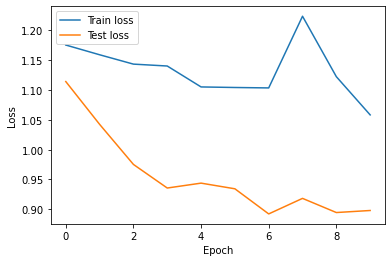

In [64]:
plt.plot(range(num_epoch), seq_train_loss, label="Train loss")
plt.plot(range(num_epoch), seq_test_loss, label="Test loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [65]:
seq_train_acc

[56.70466712855073,
 57.30931536184418,
 57.5234616111356,
 57.94545569062166,
 58.80833910688417,
 58.550103923915096,
 59.15475215720854,
 55.74100900673931,
 58.10291616804182,
 60.48371858663476]

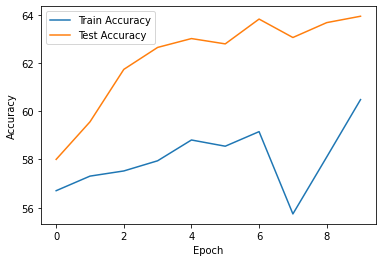

In [66]:
plt.plot(range(num_epoch), seq_train_acc, label="Train Accuracy")
plt.plot(range(num_epoch), seq_test_acc, label="Test Accuracy")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
'''
conv layer 7개로 간단하게 모델 구성 maxpool 2번
파라미터 천 만개로 매우 많은 편 -> overfitting 발생할 수도 
일단 최대한 해보자
fc layer 파라미터 줄여보기 32*9*9

그 후 
conv layer를 8개로 추가해서 학습 진행
train보다 test가 더 좋은 상황?? 이 발생했는데 정확한 원인은 알 수 없었다. 모델이 test set으로 분류된 이미지에 더 적합했을까?
조금씩 학습이 되는 중...
하지만 학습이 더디고 60%대를 넘지 못 하는 것 같아 모델의 한계를 보임
학습이 너무 더딘 게 아쉽다


시간 상 기존에 존재하는 모델인 vggnet 모델을 구현해서 마지막으로 test를 해보고 싶었는데 그러지 못 해서 아쉬웠다
기존에 존재하는 모델이 얼마나 뛰어난지도 꼭 확인해보고 싶다
vggnet 모델을 구현해서 학습을 시켜보자(final)

느낀 점 
파라미터 갯수가 꼭 중요한 건 아니다
모델이 너무 복잡하면 overfitting 문제가 발생할 수 있다
ovrefitting 문제를 잡아내는 일도 쉽지 않았다(train accuracy가 78%대까지 간 적 있었으나 test accuracy는 50%인 적이 있었다)
모델을 처음부터 직접 구성해보는 건 쉽지 않은 일이다
'''